In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

### At first, let's examine one photon list at certain $z$:

In [2]:
hdul = fits.open("../data/eROSITA_5.0x5.0/Phox/phlist_140.fits")
hdul.info()

Filename: ../data/eROSITA_5.0x5.0/Phox/phlist_140.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  SRC_CAT       1 BinTableHDU     40   1R x 10C   [K, 26A, E, E, E, E, E, 10A, 10A, 4A]   
  2  PHLIST        1 BinTableHDU     24   120193R x 3C   [E, E, E]   


In [3]:
display(hdul[0].header)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
SIMUL   = 'Magneticum_Box2_hr' / Simulation name                                
SNAPNUM =                  140 / Snapshot nuber                                 
REDSHIFT=    0.032637492755919 / Redshift of simulation                         
MODE    =                    1 / 1=ICM,2=AGM,3=ICM+AGN                          
INSTR   = 'UNSPECIFIED'        / Instrument name                                
AREA    =                1000. / Nominal area of instrument [cm2]               
TIME    =               10000. / Nominal observation time [sec]                 
XC      =            327049.96 / Center X Position [kpc/h]                      
YC      =            145467.

In [4]:
redshift = hdul[0].header["REDSHIFT"]
redshift

0.032637492755919

In [5]:
display(hdul[1].header)
pd.DataFrame(hdul[1].data)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   78 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'SRC_ID  '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'SRC_NAME'                                                            
TFORM2  = '26A     '                                                            
TTYPE3  = 'RA      '        

,SRC_ID,SRC_NAME,RA,DEC,E_MIN,E_MAX,FLUX,SPECTRUM,IMAGE,TIMING
0,0,Magneticum_Box2_hr,0.0,0.0,0.5,2.0,3.552914e-12,"[PHLIST,1]","[PHLIST,1]",NULL


In [6]:
display(hdul[2].header)
pd.DataFrame(hdul[2].data)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   12 / length of dimension 1                          
NAXIS2  =               120193 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'ENERGY  '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'DEC     '        

,ENERGY,RA,DEC
0,0.174720,12.345076,8.041383
1,0.196802,12.362880,8.046046
2,0.172295,12.454258,7.612723
3,0.196815,12.488893,7.578537
4,0.154435,12.532758,7.645539
...,...,...,...
120188,0.532710,8.362796,11.508200
120189,0.663472,8.357619,11.532402
120190,0.723540,8.365278,11.509803
120191,1.393147,8.359397,11.531865


In [7]:
data = hdul[2].data
table = pd.DataFrame(data[:])
table["REDSHIFT"] = redshift
print(table.to_numpy())
table
#a = table.to_numpy()[0:2]
#b = table.to_numpy()[2:4]
#np.concatenate((a,b))

[[ 0.1747205  12.34507561  8.04138279  0.03263749]
 [ 0.19680159 12.36287975  8.04604626  0.03263749]
 [ 0.17229494 12.45425797  7.61272335  0.03263749]
 ...
 [ 0.72353977  8.36527824 11.50980282  0.03263749]
 [ 1.39314687  8.35939693 11.53186512  0.03263749]
 [ 3.37372637  8.34757519 11.52863026  0.03263749]]


,ENERGY,RA,DEC,REDSHIFT
0,0.174720,12.345076,8.041383,0.032637
1,0.196802,12.362880,8.046046,0.032637
2,0.172295,12.454258,7.612723,0.032637
3,0.196815,12.488893,7.578537,0.032637
4,0.154435,12.532758,7.645539,0.032637
...,...,...,...,...
120188,0.532710,8.362796,11.508200,0.032637
120189,0.663472,8.357619,11.532402,0.032637
120190,0.723540,8.365278,11.509803,0.032637
120191,1.393147,8.359397,11.531865,0.032637


In [8]:
list(table)

['ENERGY', 'RA', 'DEC', 'REDSHIFT']

In [9]:
min(data["ENERGY"]), max(data["ENERGY"])

(0.08548613, 10.225753)

In [10]:
data.field("RA").mean()

10.602292

In [11]:
data.field("DEC").mean()

10.323925

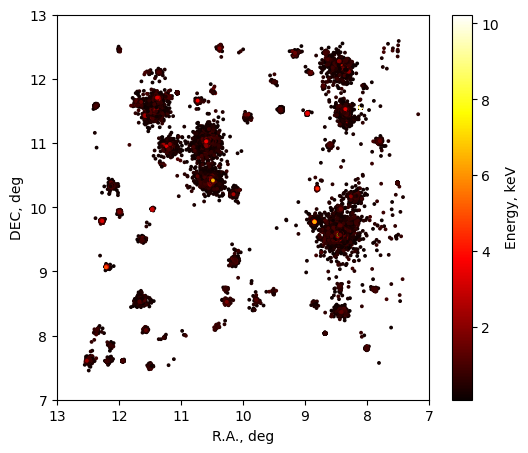

In [12]:
plt.figure(figsize=(6,5))

plt.scatter(table["RA"], table["DEC"], s=3, c=table["ENERGY"], cmap=plt.hot())
#plt.gca().invert_xaxis()
plt.xlabel("R.A., deg")
plt.ylabel("DEC, deg")
plt.xlim(13,7)
plt.ylim(7,13)
plt.colorbar(label='Energy, keV')
plt.show()

### Plot horizontal stack of some slices:

In [13]:
wd = 'eROSITA_5.0x5.0/Phox/'
mylist = sorted(os.listdir("/home/aleksei/work/clusters/data/"+wd))

mylist = [item for item in mylist if item[:6] == "phlist"]
print(mylist)
print(len(mylist))

table_merged = [np.zeros((4))]

['phlist_036.fits', 'phlist_040.fits', 'phlist_044.fits', 'phlist_048.fits', 'phlist_052.fits', 'phlist_056.fits', 'phlist_060.fits', 'phlist_064.fits', 'phlist_068.fits', 'phlist_072.fits', 'phlist_076.fits', 'phlist_080.fits', 'phlist_084.fits', 'phlist_088.fits', 'phlist_092.fits', 'phlist_096.fits', 'phlist_100.fits', 'phlist_104.fits', 'phlist_108.fits', 'phlist_112.fits', 'phlist_116.fits', 'phlist_120.fits', 'phlist_124.fits', 'phlist_128.fits', 'phlist_132.fits', 'phlist_136.fits', 'phlist_140.fits']
27


In [14]:
%matplotlib inline

0.032637492755919
0.13708140389145
0.25208907108834
0.378728942865135
0.518177533681145
0.67173035403495
0.840813946064343
1.04333952595596
1.47758105523001


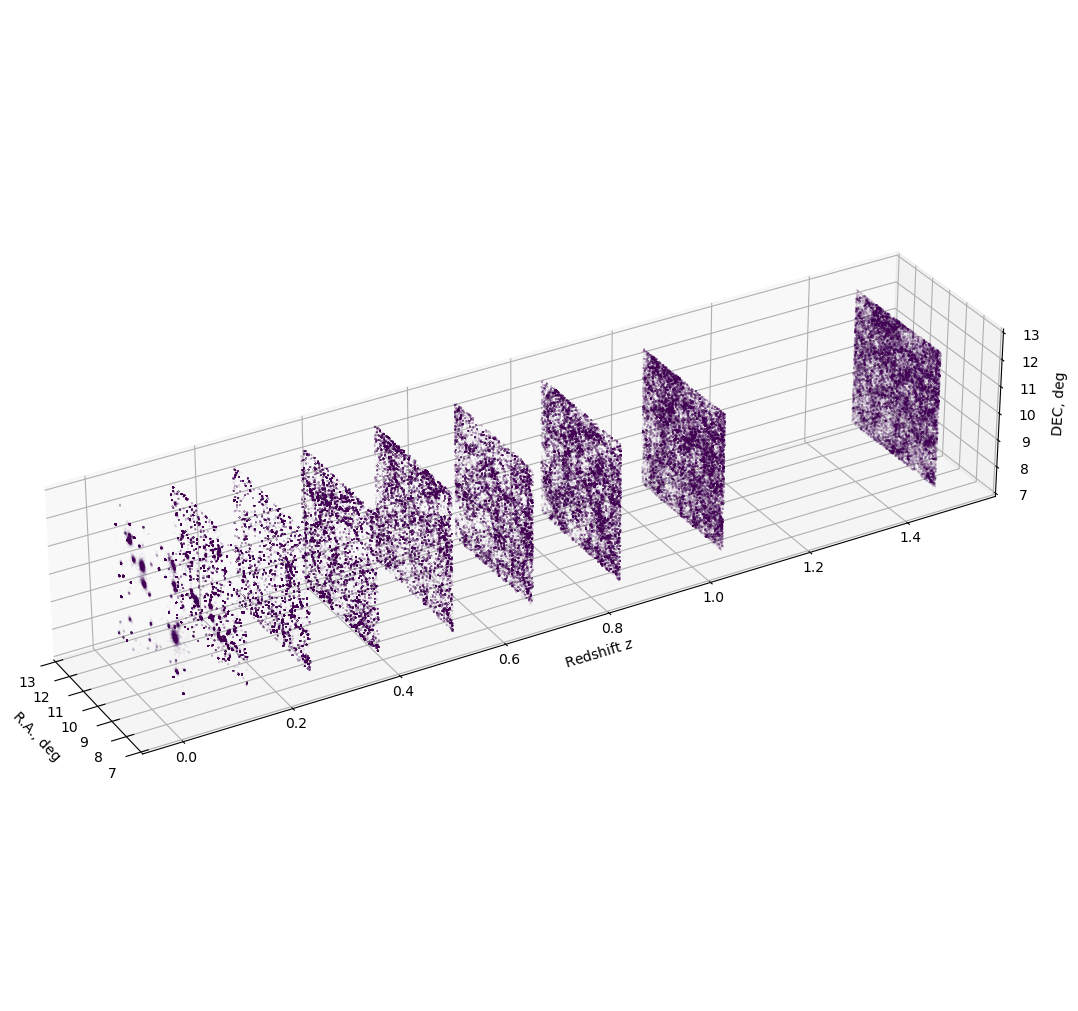

In [139]:
fig = plt.figure(figsize=(10,10), layout="constrained")
ax = fig.add_subplot(projection='3d')

ENE = []

for item in mylist[::-3]:
        
    hdul = fits.open("/home/aleksei/work/clusters/data/eROSITA_5.0x5.0/Phox/"+item)
    redshift = hdul[0].header["REDSHIFT"]
    print(redshift)

    SLICE = pd.DataFrame(hdul[2].data[:])

    ra = SLICE["RA"]
    dec = SLICE["DEC"]
    ene = SLICE["ENERGY"]

    # By using zdir='y', the y value of these points is fixed to the zs value 0
    # and the (x, y) points are plotted on the x and z axes.
    
    ax.scatter(ra, redshift, zs=dec, zdir='z', c=ene, 
               #norm=colors.LogNorm(vmin=ene.min(), vmax=ene.max()),
               cmap='viridis', s=0.001) #ene/max(ene), alpha=ene/max(ene))
    
    ax.set_xlabel("R.A., deg")
    ax.set_ylabel('\n \n Redshift $z$')
    ax.set_zlabel("DEC, deg")
    ax.set_xlim(13, 7)
    ax.set_zlim(7, 13)
    
    ENE = np.concatenate((ENE, ene))

    hdul.close()

mappable = cm.ScalarMappable()
mappable.set_array(ENE)
#fig.colorbar(mappable, label='Energy, keV', 
#             location="bottom", fraction=0.046, pad=0.04) # shrink=0.5, aspect=10

# Customize the view angle so it's easier to see that the scatter points lie on the plane y=0
ax.view_init(elev=30., azim=-30)

ax.set_box_aspect(aspect = (1,5,1), zoom = 1)

#fig.set_constrained_layout(True)
#fig.set_layout_engine("constrained")

plt.show()

### Now I concatenate all available photon lists:

In [57]:
length = 0

for item in mylist:
        
    hdul = fits.open("/home/aleksei/work/clusters/data/eROSITA_5.0x5.0/Phox/"+item)
    redshift = hdul[0].header["REDSHIFT"]

    data = hdul[2].data
    table = pd.DataFrame(data[:])
    table["REDSHIFT"] = redshift

    table_array = table.to_numpy()
    length = length + len(table_array)

    table_merged = np.concatenate((table_merged, table_array))

    #print(wd+item, )
    #print(table.to_numpy())
    hdul.close()
        
print(type(table_merged[1:]))
print(length)

<class 'numpy.ndarray'>
2534310


In [50]:
pd.DataFrame(table_merged, columns=["ENERGY", "RA", "DEC", "REDSHIFT"]).drop(0).to_csv('../data/eROSITA_5.0x5.0/phlist_merged.csv', index=False)

In [72]:
data_name = '../data/eROSITA_5.0x5.0/phlist_merged.csv'
  
table_fin = pd.read_csv(data_name, sep=',')
table_fin

,ENERGY,RA,DEC,REDSHIFT
0,0.192924,12.408702,10.847042,1.980082
1,0.192926,8.950354,10.785010,1.980082
2,0.243718,8.782914,10.731757,1.980082
3,0.243551,12.420747,10.846295,1.980082
4,0.220286,8.942597,10.764423,1.980082
...,...,...,...,...
2534305,0.532710,8.362796,11.508200,0.032637
2534306,0.663472,8.357619,11.532402,0.032637
2534307,0.723540,8.365278,11.509803,0.032637
2534308,1.393147,8.359397,11.531865,0.032637


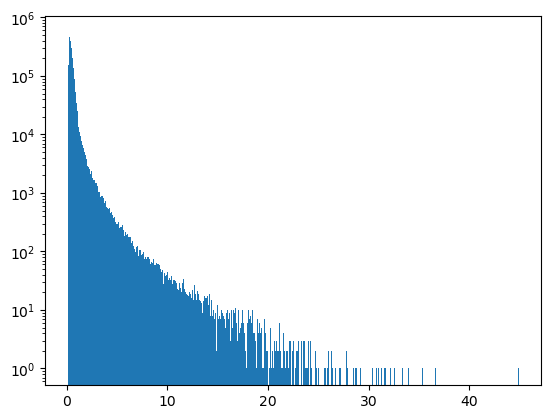

In [108]:
energies = table_fin["ENERGY"]

plt.hist(energies, bins=500)
plt.yscale('log')
plt.show()

In [142]:
max_ene = 20

table_fin1 = table_fin[energies<max_ene]
table_fin1

,ENERGY,RA,DEC,REDSHIFT
0,0.192924,12.408702,10.847042,1.980082
1,0.192926,8.950354,10.785010,1.980082
2,0.243718,8.782914,10.731757,1.980082
3,0.243551,12.420747,10.846295,1.980082
4,0.220286,8.942597,10.764423,1.980082
...,...,...,...,...
2534305,0.532710,8.362796,11.508200,0.032637
2534306,0.663472,8.357619,11.532402,0.032637
2534307,0.723540,8.365278,11.509803,0.032637
2534308,1.393147,8.359397,11.531865,0.032637


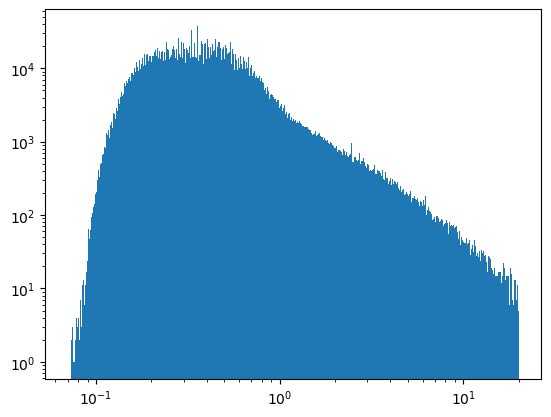

In [143]:
plt.hist(table_fin1["ENERGY"], bins=np.logspace(np.log10(0.07),np.log10(max_ene), 500))
plt.xscale('log')
plt.yscale('log')
plt.show()

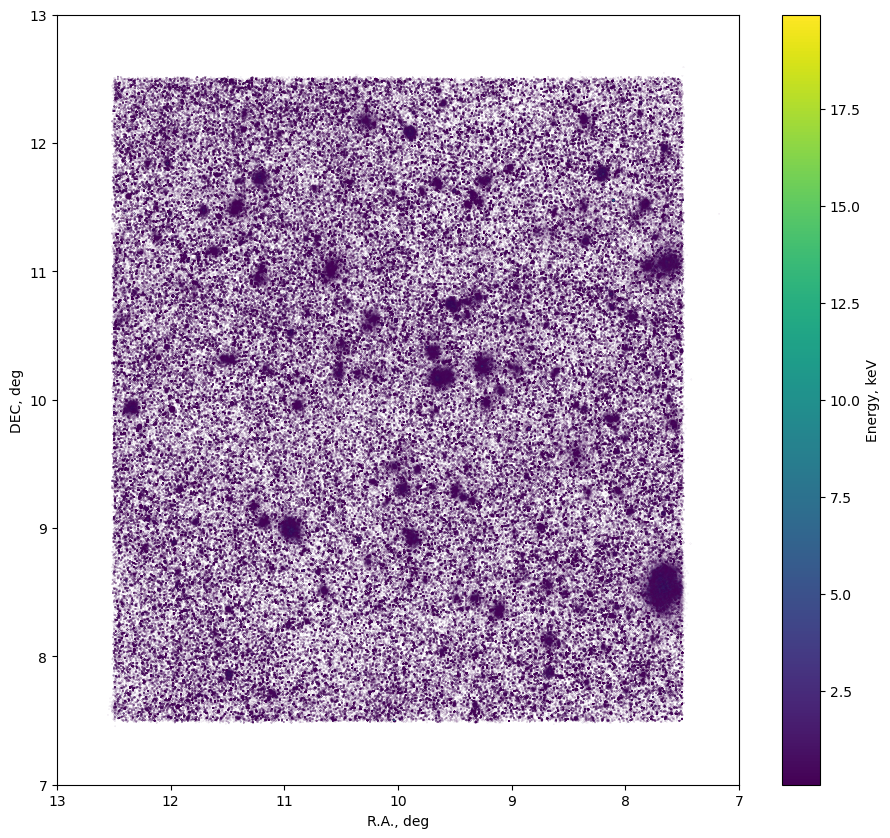

In [144]:
plt.figure(figsize=(11,10))

ra = table_fin1["RA"]
dec = table_fin1["DEC"]

plt.scatter(ra, dec, s=0.001, c=table_fin1["ENERGY"], cmap='viridis')
#plt.gca().invert_xaxis()
plt.xlabel("R.A., deg")
plt.ylabel("DEC, deg")
plt.xlim(13,7)
plt.ylim(7,13)
plt.colorbar(label='Energy, keV')
plt.show()

In eROSITA sub-directory there is a script, where given the position (from the
catalouge) in the lightcone, sixte is used to produce event files for all the simput
files, which then get merged. It produces 3 event fiels, one for the ICM emission
only, one for the AGN emission and one for the combined. The result for the
given example is included.

In [128]:
hdul = fits.open("../data/eROSITA_5.0x5.0/eROSITA/erosita_merged_evt_icm.fits")
hdul.info()

Filename: ../data/eROSITA_5.0x5.0/eROSITA/erosita_merged_evt_icm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      64   ()      
  1  EVENTS        1 BinTableHDU    117   48728R x 15C   [D, J, J, E, I, I, D, D, 2J, 2J, I, J, I, 9E, 9J]   
  2  STDGTI        1 BinTableHDU     25   1R x 2C   [D, D]   


In [129]:
display(hdul[0].header)

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'ECAP    '                                                            
CREATOR = 'SIXTE   '                                                            
TELESCOP= 'eROSITA '                                                            
INSTRUME= 'FM1     '                                                            
FILTER  = 'Normal  '                                                            
ANCRFILE= 'arf01_200nmAl_sdtq.fits' / ancillary response file                   
RESPFILE= 'sixte_erormf_norm

In [131]:
display(hdul[1].header)

XTENSION= 'BINTABLE'           / Binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  136 / width of table in bytes                        
NAXIS2  =                48728 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   15 / number of fields in each row                   
TTYPE1  = 'TIME    '           / Time of event detection                        
TFORM1  = 'D       '           / Format of column TIME                          
TTYPE2  = 'FRAME   '           / Frame counter                                  
TFORM2  = 'J       '           / Format of column FRAME                         
TTYPE3  = 'PI      '        

In [134]:
hdul[1].data

FITS_rec([( 155.55758313,   3104, 22, 2.0718962e-01, 212,  53, 10.99427571, 10.15865182, [  620,     0], [0, 0], 6, 3, 0, [0.00000000e+00, 4.06208273e-04, 0.00000000e+00, 0.00000000e+00, 1.95357159e-01, 1.14262495e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], [ 0, -1,  0,  0, 19, -1,  0,  0,  0]),
          ( 155.55758313,   3104, -1, 2.3758726e-05, 213,  52, 10.99928003, 10.15467078, [  620,     0], [0, 0], 0, 1, 0, [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.37587265e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], [ 0,  0,  0,  0, -1,  0,  0,  0,  0]),
          ( 216.94870404,   4329, 32, 2.5960302e-01, 118, 197, 10.73885635, 10.54617464, [  858,     0], [0, 0], 6, 3, 0, [0.00000000e+00, 3.16832797e-03, 0.00000000e+00, 0.00000000e+00, 2.10931569e-01, 4.55031209e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], [ 0, -1,  0,  0, 22, -1,  0,  0,  0]),
          ...,
          (9732.4221007 , 194201, -1, 4.3973592e-03, 270, 363, 1

In [135]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'START   '           / GTI start time                                 
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 's       '           / physical unit of field                         
TTYPE2  = 'STOP    '           / GTI stop  time                                 
TFORM2  = 'D       '        

In [138]:
hdul[2].data

FITS_rec([(0., 10000.)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))